In [1]:
def julia(zx, zy, cx, cy, threshold):
    # initial conditions
    z = complex(zx, zy)
    c = complex(cx, cy)

    for i in range(threshold):
        z = z**2 + c
        if abs(z) > 4.0:  # it diverged
            return i

    return threshold - 1  # it didn't diverge

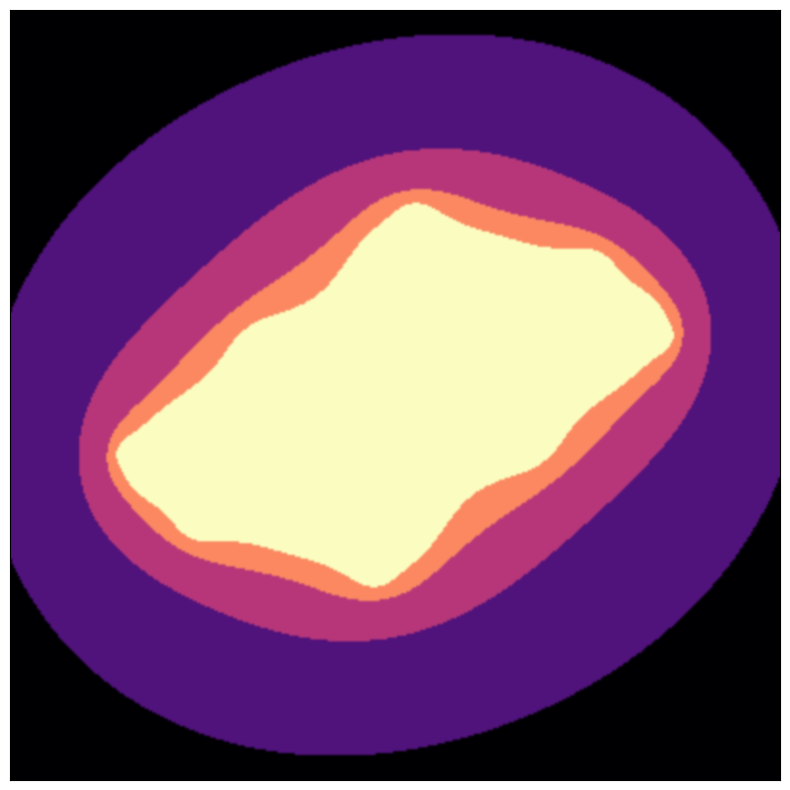

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x_start, y_start = -2, -2  # an interesting region starts here
width, height = 4, 4  # for 4 units up and right
density_per_unit = 100  # how many pixles per unit

# real and imaginary axis
re = np.linspace(x_start, x_start + width, width * density_per_unit)
im = np.linspace(y_start, y_start + height, height * density_per_unit)

frames = 50  # number of frames in the animation
thresholds = np.linspace(5, 200, frames)  # max allowed iterations

fig = plt.figure(figsize=(10, 10))  # instantiate a figure to draw
ax = plt.axes()  # create an axes object


def animate(i):
    ax.clear()  # clear axes object
    ax.set_xticks([], [])  # clear x-axis ticks
    ax.set_yticks([], [])  # clear y-axis ticks

    X = np.empty((len(re), len(im)))  # the initial array-like image
    cx, cy = -0.512511498387847167, 0.521295573094847167  # the c number
    threshold = thresholds[i]

    # iterations for the given threshold
    for i in range(len(re)):
        for j in range(len(im)):
            X[i, j] = julia(re[i], im[j], cx, cy, int(threshold))

    img = ax.imshow(X.T, interpolation="bicubic", cmap="magma")
    return [img]


anim = animation.FuncAnimation(fig, animate, frames=frames, interval=50, blit=True)
# anim.save('julia_set_assignment.gif', writer='imagemagick')